In [2]:
from pyspark.sql import SparkSession

import matplotlib.pyplot as plt

from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col

spark = SparkSession.builder.appName("Wrangling Data").getOrCreate()
sc = spark.sparkContext

In [3]:
spark.sparkContext.parallelize(range(1000)).map(lambda x: x*x).take(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [8]:
# https://www.kaggle.com/murderaccountability/homicide-reports/data
df = spark.read.csv("./database.csv", header=True)

In [5]:
df.printSchema()
df.head()

root
 |-- Record ID: string (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: string (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: string (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Victim Ethnicity: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: string (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Perpetrator Ethnicity: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: string (nullable = true)
 |-- Perpetrator Count: string (nullable = true)
 |-- Rec

Row(Record ID='000001', Agency Code='AK00101', Agency Name='Anchorage', Agency Type='Municipal Police', City='Anchorage', State='Alaska', Year='1980', Month='January', Incident='1', Crime Type='Murder or Manslaughter', Crime Solved='Yes', Victim Sex='Male', Victim Age='14', Victim Race='Native American/Alaska Native', Victim Ethnicity='Unknown', Perpetrator Sex='Male', Perpetrator Age='15', Perpetrator Race='Native American/Alaska Native', Perpetrator Ethnicity='Unknown', Relationship='Acquaintance', Weapon='Blunt Object', Victim Count='0', Perpetrator Count='0', Record Source='FBI')

In [6]:
# Count null values in each column
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+-----------+-----------+-----------+----+-----+----+-----+--------+----------+------------+----------+----------+-----------+----------------+---------------+---------------+----------------+---------------------+------------+------+------------+-----------------+-------------+
|Record ID|Agency Code|Agency Name|Agency Type|City|State|Year|Month|Incident|Crime Type|Crime Solved|Victim Sex|Victim Age|Victim Race|Victim Ethnicity|Perpetrator Sex|Perpetrator Age|Perpetrator Race|Perpetrator Ethnicity|Relationship|Weapon|Victim Count|Perpetrator Count|Record Source|
+---------+-----------+-----------+-----------+----+-----+----+-----+--------+----------+------------+----------+----------+-----------+----------------+---------------+---------------+----------------+---------------------+------------+------+------------+-----------------+-------------+
|        0|          0|          0|          0|   0|    0|   0|    0|       0|         0|           0|         0|         0|      

In [7]:
# count white space in each column
df.select([count(when(col(c).rlike('^\\s+$'), c)) .alias(c) for c in df.columns]).show()
df.where(col("Perpetrator Age").rlike('^\\s+$')).show()

+---------+-----------+-----------+-----------+----+-----+----+-----+--------+----------+------------+----------+----------+-----------+----------------+---------------+---------------+----------------+---------------------+------------+------+------------+-----------------+-------------+
|Record ID|Agency Code|Agency Name|Agency Type|City|State|Year|Month|Incident|Crime Type|Crime Solved|Victim Sex|Victim Age|Victim Race|Victim Ethnicity|Perpetrator Sex|Perpetrator Age|Perpetrator Race|Perpetrator Ethnicity|Relationship|Weapon|Victim Count|Perpetrator Count|Record Source|
+---------+-----------+-----------+-----------+----+-----+----+-----+--------+----------+------------+----------+----------+-----------+----------------+---------------+---------------+----------------+---------------------+------------+------+------------+-----------------+-------------+
|        0|          0|          0|          0|   0|    0|   0|    0|       0|         0|           0|         0|         0|      

In [32]:
df.groupBy("Year").count().sort("Year").take(5)

[Row(Year='1980', count=23092),
 Row(Year='1981', count=21208),
 Row(Year='1982', count=20544),
 Row(Year='1983', count=19653),
 Row(Year='1984', count=18093)]

In [46]:
df.groupBy("Victim Sex").count().take(10)

[Row(Victim Sex='Female', count=143345),
 Row(Victim Sex='Unknown', count=984),
 Row(Victim Sex='Male', count=494125)]

In [28]:
df.describe("Year").show()

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|           638454|
|   mean|1995.801102350365|
| stddev| 9.92769331398824|
|    min|             1980|
|    max|             2014|
+-------+-----------------+



In [44]:
years = df.groupBy("Year").count().sort("Year").toPandas()

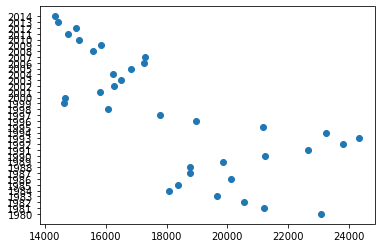

In [43]:
plt.scatter(years["count"], years.Year)

[]

In [53]:
df.select("Crime Solved").dropDuplicates().collect()

[Row(Crime Solved='No'), Row(Crime Solved='Yes')]